# Homework 1. Exploratory Data Analysis (Prob 1)

This HW Based on Harvard CS109. All work must be your original code.
---


## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data

The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."
 
#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [requests](http://docs.python-requests.org/en/latest/), grabbing from web
* [IO](https://docs.python.org/3/library/io.html), for StringIO stream
* [zipfile](https://docs.python.org/3/library/zipfile.html), for decompressing zip files.

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

The Oakland Athletics provides a wonderful success story for data science as profiled in Michael Lewis's 2003 book [Moneyball](https://en.wikipedia.org/wiki/Moneyball) and discussed recently on Nate Silver's [fivethirtyeight](http://fivethirtyeight.com/features/billion-dollar-billy-beane). In 2002 and 2003 Oakland A's had a competitive advantage using data science. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared.  Download this ipython notebook and submit a new version with your original solutions filled in.

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [IO](https://docs.python.org/3/library/io.html) and [zipfile](https://docs.python.org/3/library/zipfile.html) modules to get from the web.  

In [2]:
import io
import requests
import zipfile
r = requests.get('http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip')
zf = zipfile.ZipFile(io.BytesIO(r.content))
Teams_csv=pd.read_csv(zf.open('Teams.csv'))
Salaries_csv=pd.read_csv(zf.open('Salaries.csv'))
Salaries_csv.head()


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [3]:
new_summarized_DataFrame=Salaries_csv.groupby(['yearID','teamID']).salary.sum().reset_index()
new_summarized_DataFrame.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [4]:
merge_DataFrame=pd.merge(Teams_csv,new_summarized_DataFrame,on=['yearID','teamID'], how='inner')
new_merge_DataFrame= pd.DataFrame(merge_DataFrame,columns=['yearID','teamID','W','salary'])
new_merge_DataFrame.head()

,yearID,teamID,W,salary
0,1985,TOR,99,8812550
1,1985,NYA,97,14238204
2,1985,DET,84,10348143
3,1985,BAL,83,11560712
4,1985,BOS,81,10897560


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

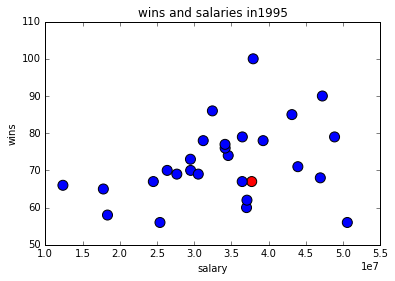

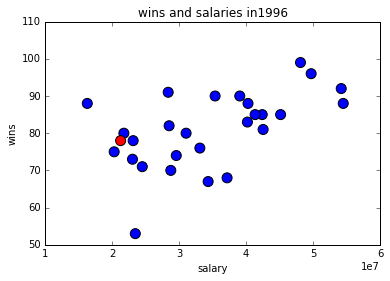

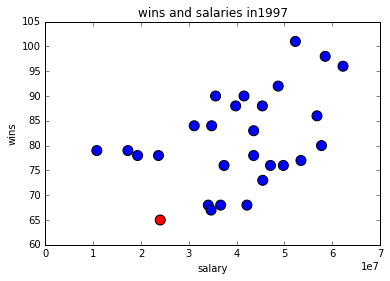

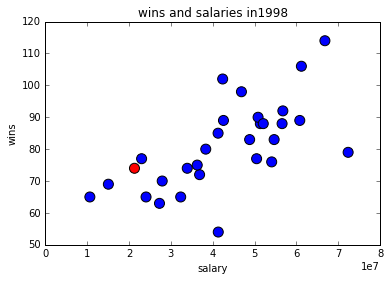

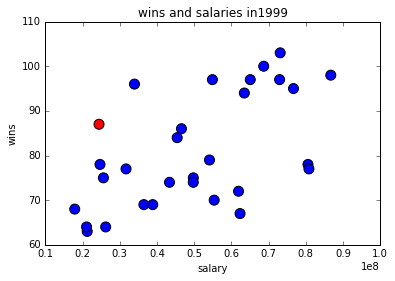

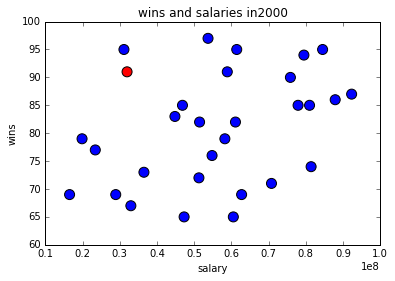

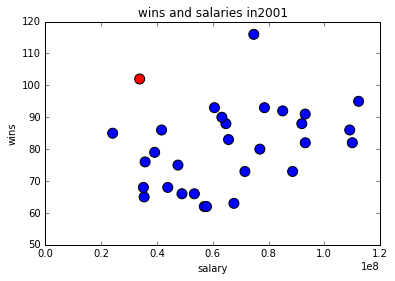

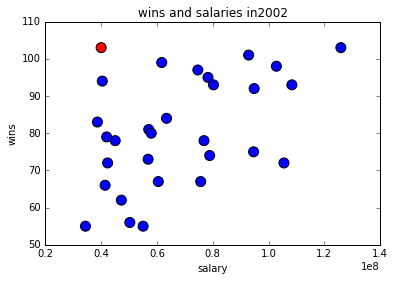

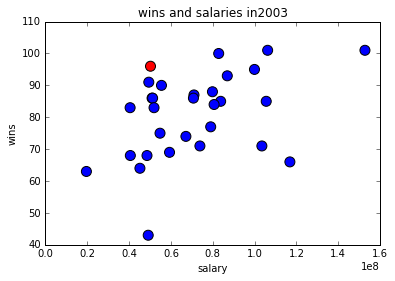

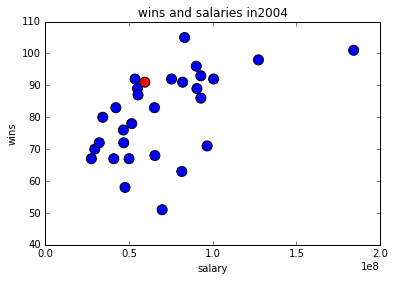

In [5]:
start=1995
stop=2005
def fuc(year):
    my_year=new_merge_DataFrame[new_merge_DataFrame.yearID==year]
    my_win=my_year['W'].values
    my_salary=my_year['salary'].values
    my_team=my_year['teamID'].values
    color = ['r' if t=='OAK' else 'b' for t in my_team]
    plt.scatter(my_salary,my_win,c=color,s=100)
    plt.xlabel('salary')
    plt.ylabel('wins')
    plt.title('wins and salaries in'+str(year))
my_range=range(start,stop);
for y in my_range:
    fuc(y)
    plt.figure()

#### Problem 1(e):

Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

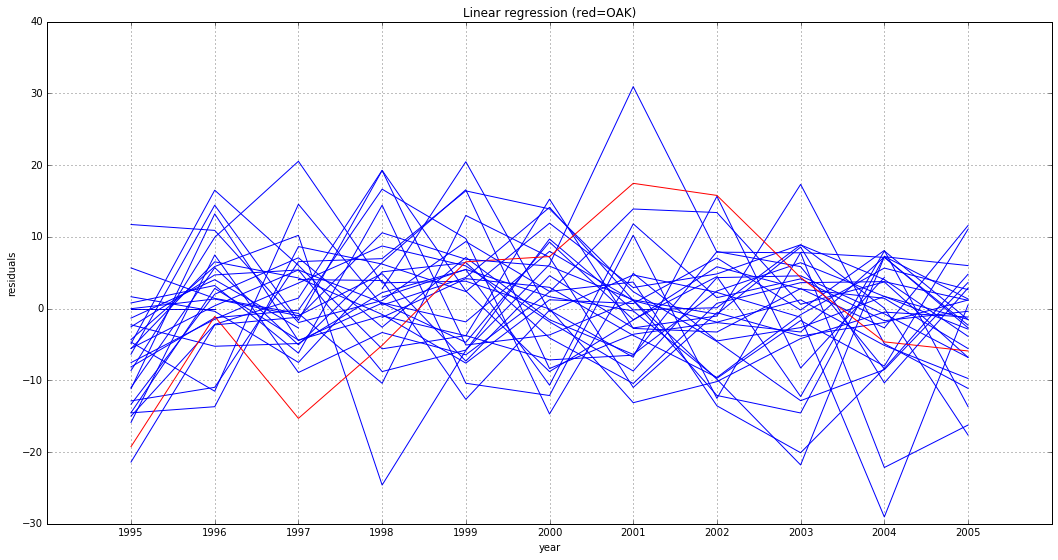

In [6]:
begin = 1995
end = 2005

from sklearn import linear_model
m_year = new_merge_DataFrame[(new_merge_DataFrame.yearID>=begin) & (new_merge_DataFrame.yearID<=end)]
plt.figure(num=None, figsize=(18,9))
linReg = linear_model.LinearRegression()

for team in set(m_year['teamID'].values):
    grouped_team = m_year[m_year.teamID==team]
    years = grouped_team.loc[:,[ 'yearID']].values
    salaries = grouped_team.loc[:,[ 'salary']].values
    wins = grouped_team.loc[:,[ 'W']].values 
    linReg.fit(salaries, wins)   
    predicted_wins = linReg.predict(salaries)
    residuals = wins - predicted_wins
    plt.plot(years, residuals, color=('r' if team=='OAK' else 'b'))

plt.xticks(range(begin,end+1), [str(year) for year in range(begin,end+1)])
plt.title('Linear regression (red=OAK)')
plt.ylabel('residuals')
plt.xlabel('year')
plt.grid(True)
plt.show()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


As graph show above, OAK team has disadvantages at the beginning of the year. OAK team apply data science to their team in 2001 since residuals arrive very high position in the graph. The benefit of data science is most efficient in 2001 and 2002. After 2002, the benefit decreases.